<b> Data Checking </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Online_Payments_Fraud_Detection.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<b> Exploratory Data Analysis </b>

In [6]:
df = df.drop('isFlaggedFraud', axis = 1)

In [7]:
df['Fraud'] = df['isFraud'].apply(lambda x: "Not Fraud" if x == 0 else "Fraud")

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


(0.0, 100000.0)

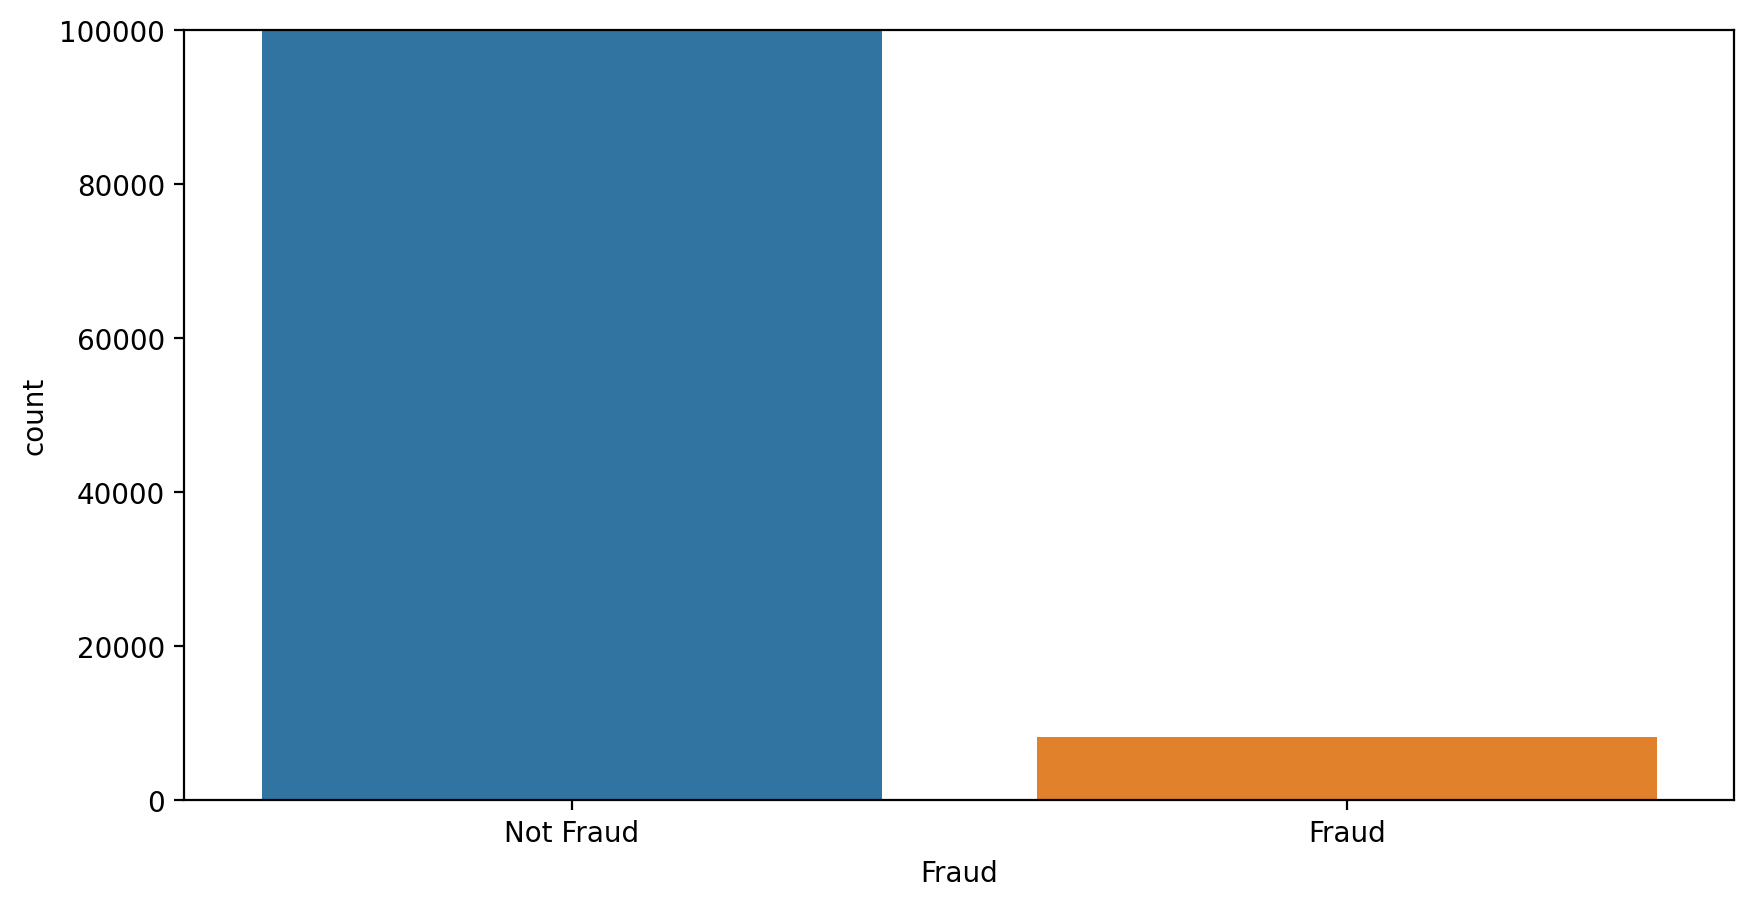

In [9]:
plt.figure(figsize=(10,5), dpi=200)
sns.countplot(x='Fraud', data=df)
plt.ylim(0,100000)

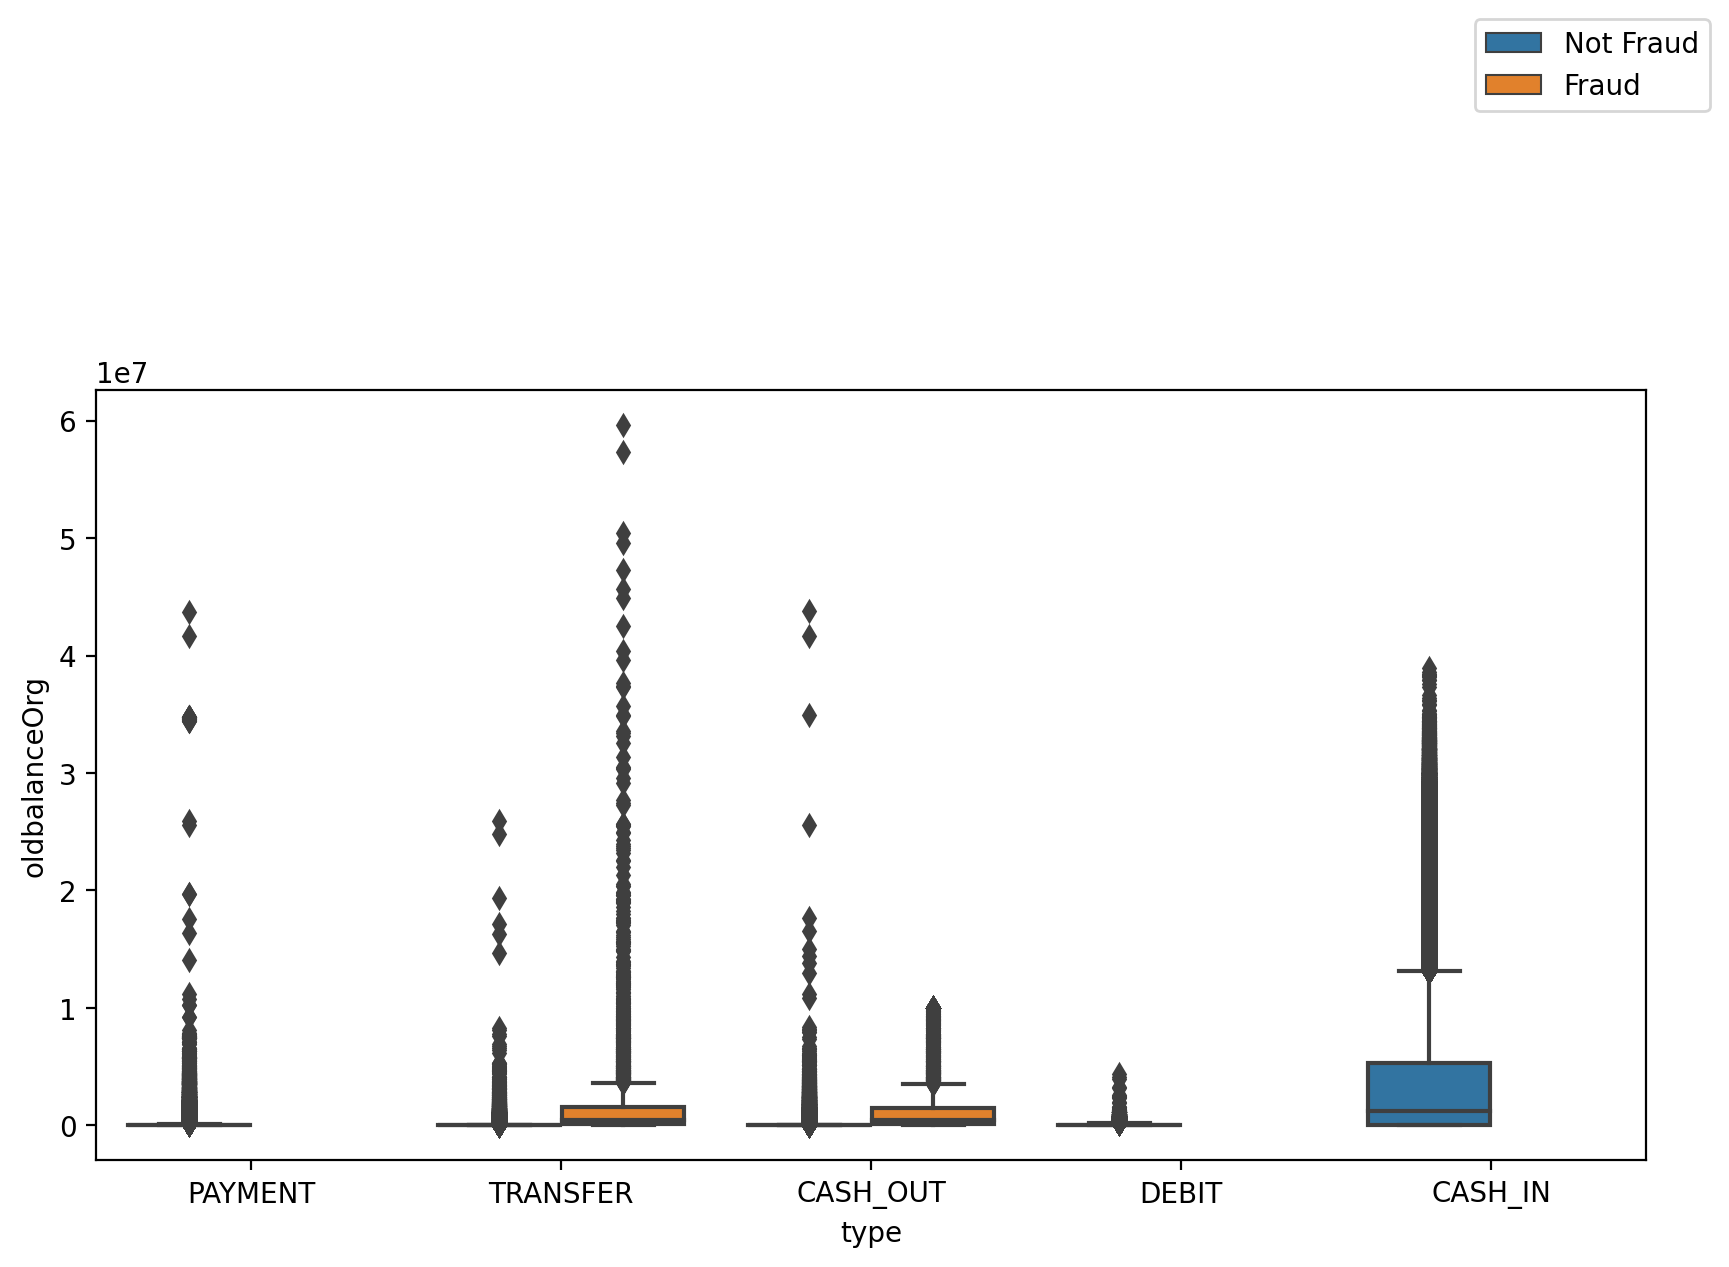

In [10]:
plt.figure(figsize=(10,5), dpi=200)
sns.boxplot(x='type', y='oldbalanceOrg',
            hue='Fraud', data=df)
plt.legend(bbox_to_anchor=(1.05, 1.5))

In [11]:
df.rename(columns={'newbalanceOrig': 'newbalanceOrg'}, inplace=True)

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


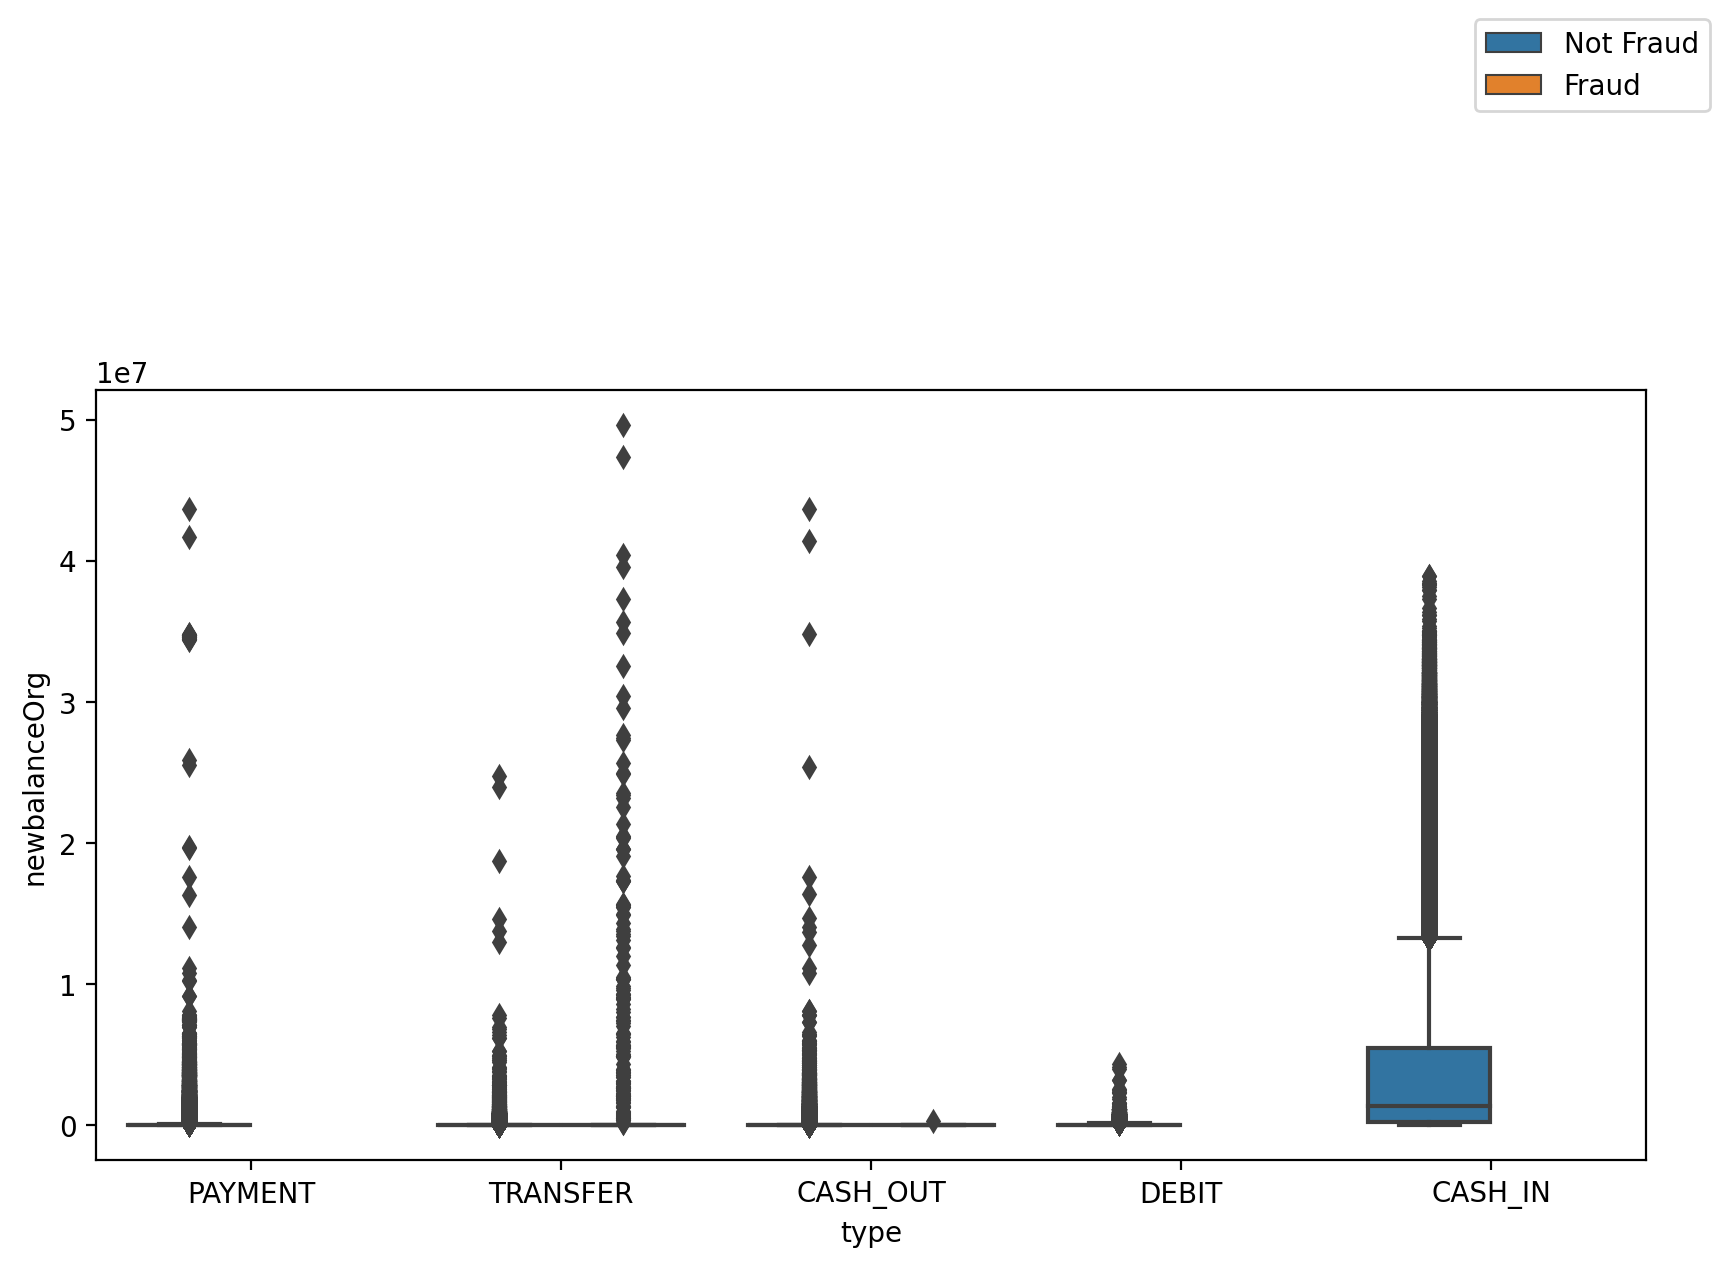

In [13]:
plt.figure(figsize=(10,5), dpi=200)
sns.boxplot(x='type', y='newbalanceOrg',
            hue='Fraud', data=df)
plt.legend(bbox_to_anchor=(1.05, 1.5))

<b> Predictive Modeling </b>

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


In [15]:
X = pd.get_dummies(df.drop(['step', 'nameOrig', 'nameDest', 'isFraud', 'Fraud'], axis = 1))

In [16]:
X

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [17]:
y = df['Fraud']

In [18]:
y

0          Not Fraud
1          Not Fraud
2              Fraud
3              Fraud
4          Not Fraud
             ...    
6362615        Fraud
6362616        Fraud
6362617        Fraud
6362618        Fraud
6362619        Fraud
Name: Fraud, Length: 6362620, dtype: object

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# criterion = ['gini', 'entropy', 'log_loss']
# splitter = ['best', 'random']
# max_features = ['auto', 'sqrt', 'log2']

# param_grid = {'criterion': criterion,
#            'splitter': splitter,
#            'max_features': max_features}

In [24]:
model = DecisionTreeClassifier()

In [25]:
# grid = GridSearchCV(model, param_grid)

In [26]:
# grid.fit(X_train, y_train)

In [27]:
# grid.best_params_

In [28]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_features = 'log2',
                             splitter = 'best')

In [29]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [30]:
prediction = dtc.predict(X_test)

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [32]:
def report(model):
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

       Fraud       0.86      0.83      0.84       817
   Not Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.93      0.91      0.92    636262
weighted avg       1.00      1.00      1.00    636262



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


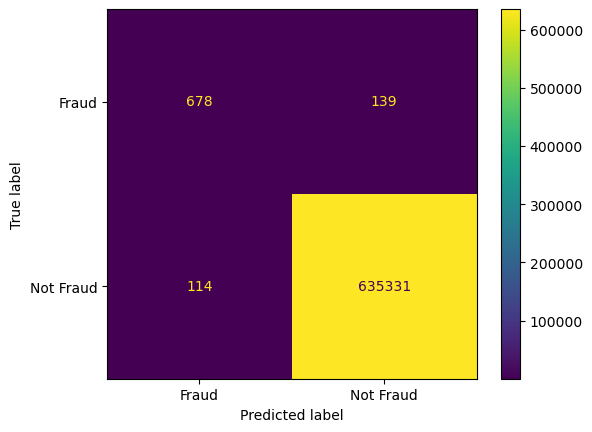

In [46]:
report(dtc)

In [52]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud


In [53]:
X.head(1)

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0


In [62]:
new_data = [[9839.64, 170136.0, 160296.36, 0.0, 0.0, 0, 0, 0, 1, 0]]

In [63]:
preds = dtc.predict(new_data)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [64]:
preds

array(['Not Fraud'], dtype=object)

In [65]:
new_data = [[9128, 20987, 2347.98, 0.0, 0.0, 0, 0, 0, 0, 1]]

In [66]:
preds = dtc.predict(new_data)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [67]:
preds

array(['Fraud'], dtype=object)